# Compare Jnkep model and Petigura2020 model

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import matplotlib

In [40]:
### Define data directory
working_dir = os.getcwd()
data_dir = os.path.join(working_dir, "data")
print(f"Data directory: {data_dir}")

Data directory: /Users/pentrican10/Projects/k2-19-project/data


In [41]:
### Define data directory
# data_dir = "/Users/pentrican10/Projects/Data/k2-19-data"

TESS_offset = 2457000
petigura_offset = 2454833

In [42]:
### get data from jnkepler fit
import json

# Load the data from the JSON file
with open("jnkep_fit_data.json", "r") as f:
    data = json.load(f)

# Access values just like a dictionary
t_jnkep_b = data["jnkep_model_times"]["b"]
t_jnkep_c = data["jnkep_model_times"]["c"]

t_obs_b = data["jnkep_observed_times"]["b"]
t_obs_c = data["jnkep_observed_times"]["c"]

index_obs_b = data["jnkep_observed_index"]["b"]
index_obs_c = data["jnkep_observed_index"]["c"]

best_fit_period_b = data["best_fit_params"]["period"]["b"]
best_fit_period_c = data["best_fit_params"]["period"]["c"]

best_fit_tc_b = data["best_fit_params"]["tc"]["b"]
best_fit_tc_c = data["best_fit_params"]["tc"]["c"]

In [43]:
def ephem(p,tc,ind):
    t = tc + (p*ind)
    return t

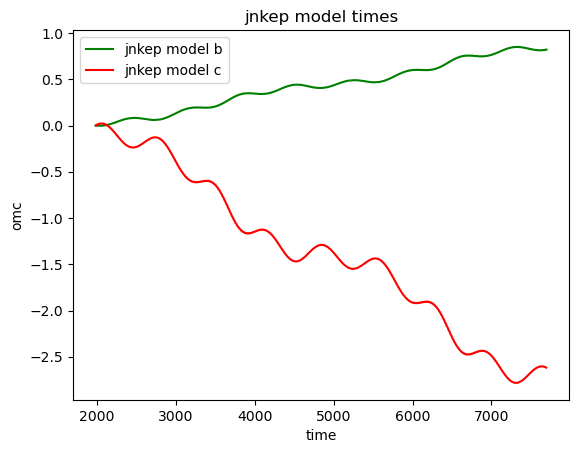

In [44]:
### plot the jnkep model
ind_jnkep_b = np.arange(0,(len(np.array(t_jnkep_b))), 1)
ind_jnkep_c = np.arange(0,(len(np.array(t_jnkep_c))), 1)

jnkep_ephem_time_b = ephem(best_fit_period_b, best_fit_tc_b, ind_jnkep_b)
jnkep_ephem_time_c = ephem(best_fit_period_c, best_fit_tc_c, ind_jnkep_c)

jnkep_omc_b = t_jnkep_b - jnkep_ephem_time_b
jnkep_omc_c = t_jnkep_c - jnkep_ephem_time_c

plt.plot(t_jnkep_b, jnkep_omc_b, label='jnkep model b', c='g')
plt.plot(t_jnkep_c, jnkep_omc_c, label='jnkep model c', c='r')
plt.title('jnkep model times')
plt.xlabel('time')
plt.ylabel('omc')
plt.legend()
plt.show()

In [45]:
### Predicted times from Petigura2020
file_petigura_predicted_time = 'ajab5220t4_mrt.txt'
def read_table(file_name):
    ### path to table - Petigura et al 2020
    file_path = os.path.join(data_dir, file_name)

    ### Define the column names 
    columns = ["Planet", "Transit","Date", "Tc_pred", "e_Tc_pred"]

    ### Read the text file, specifying space as the delimiter, skipping model_guess_omc rows
    df = pd.read_csv(file_path, delim_whitespace=True, skiprows=17, names=columns)

    ### Remove NaN values
    df = df.dropna()
    return df

df_petigura_mod = read_table(file_petigura_predicted_time)

### separate by planet
df_petigura_b = df_petigura_mod[df_petigura_mod["Planet"] == 'b']
print(df_petigura_b)
df_petigura_c = df_petigura_mod[df_petigura_mod["Planet"] == 'c']

     Planet  Transit        Date    Tc_pred  e_Tc_pred
0         b        0  2014-06-04  1980.3840     0.0002
2         b        1  2014-06-12  1988.3041     0.0002
4         b        2  2014-06-20  1996.2220     0.0002
5         b        3  2014-06-28  2004.1406     0.0002
7         b        4  2014-07-06  2012.0614     0.0001
...     ...      ...         ...        ...        ...
1189      b      714  2029-11-28  7635.6831     0.0496
1191      b      715  2029-12-06  7643.6031     0.0480
1193      b      716  2029-12-14  7651.5243     0.0468
1194      b      717  2029-12-21  7659.4466     0.0446
1196      b      718  2029-12-29  7667.3662     0.0434

[719 rows x 5 columns]


/var/folders/69/wlx91x8s1x34mphlfjy0h4pm0000gn/T/ipykernel_69966/2986423380.py:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, skiprows=17, names=columns)


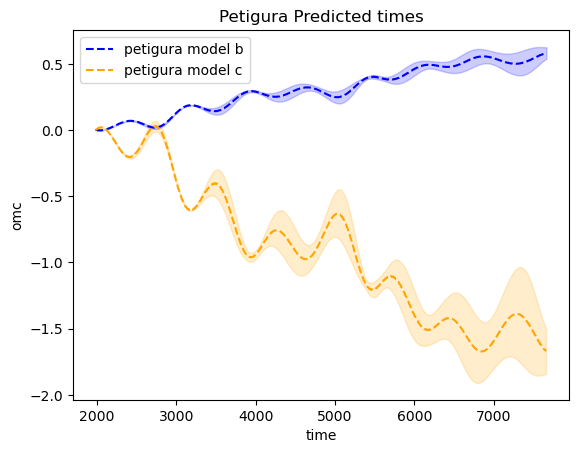

In [49]:
### best fit periods and tc
# best_fit_periods = popt['period']
# best_fit_tc = popt['tic']
# period_b_fit =  best_fit_periods[0]
# period_c_fit = best_fit_periods[1]
# tc_b_fit = best_fit_tc[0]
# tc_c_fit = best_fit_tc[1]

def ephem(p,tc,ind):
    t = tc + (p*ind)
    return t
    
ind_petigura_b = df_petigura_b["Transit"]
ind_petigura_c = df_petigura_c["Transit"]

t_petigura_b = df_petigura_b["Tc_pred"]
t_petigura_c = df_petigura_c["Tc_pred"]

t_err_petigura_b = df_petigura_b["e_Tc_pred"]
t_err_petigura_c = df_petigura_c["e_Tc_pred"]

ephem_time_b = ephem(best_fit_period_b, best_fit_tc_b, ind_petigura_b)
ephem_time_c = ephem(best_fit_period_c, best_fit_tc_c, ind_petigura_c)

ephem_omc_b = t_petigura_b - ephem_time_b
ephem_omc_c = t_petigura_c - ephem_time_c

# times = df_petigura_mod["Tc_pred"]
# plt.plot(t_petigura_b, ephem_omc_b, label='petigura model b',linestyle='--',c='b')
# plt.plot(t_petigura_c, ephem_omc_c, label='petigura model c',linestyle='--',c='orange')
# Plotting with error bars
# plt.errorbar(t_petigura_b, ephem_omc_b, yerr=t_err_petigura_b, label='petigura model b', linestyle='--', c='b')
# plt.errorbar(t_petigura_c, ephem_omc_c, yerr=t_err_petigura_c, label='petigura model c', linestyle='--', c='orange')

# Plotting
plt.plot(t_petigura_b, ephem_omc_b, label='petigura model b', linestyle='--', color='b')
plt.fill_between(t_petigura_b,
                 ephem_omc_b - t_err_petigura_b,
                 ephem_omc_b + t_err_petigura_b,
                 color='b', alpha=0.2)

plt.plot(t_petigura_c, ephem_omc_c, label='petigura model c', linestyle='--', color='orange')
plt.fill_between(t_petigura_c,
                 ephem_omc_c - t_err_petigura_c,
                 ephem_omc_c + t_err_petigura_c,
                 color='orange', alpha=0.2)

plt.title('Petigura Predicted times')
plt.xlabel('time')
plt.ylabel('omc')
plt.legend()
plt.show()

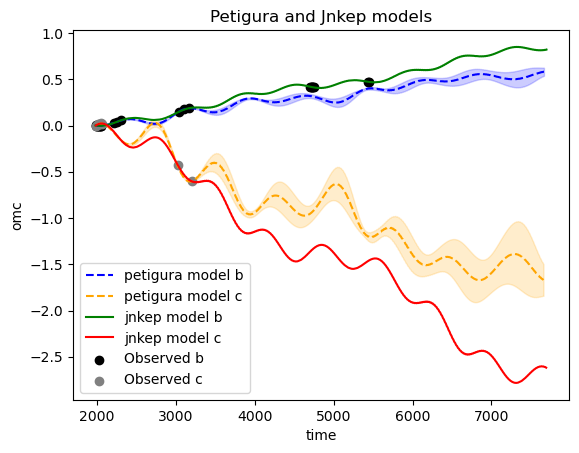

In [50]:
### adding observed data
### same ephem as the model and predictions 
index_obs_b = np.array(index_obs_b)
index_obs_c = np.array(index_obs_c)
omc_obs_b = t_obs_b - ephem(best_fit_period_b, best_fit_tc_b, index_obs_b)
omc_obs_c = t_obs_c - ephem(best_fit_period_c, best_fit_tc_c, index_obs_c)


# plt.scatter(t_obs_b, obs_omc_b, label='obs b')
# plt.scatter(t_obs_c, obs_omc_c, label='obs c')
# plt.plot(t_petigura_b, ephem_omc_b, label='petigura model b', linestyle='--',c='b')
# plt.plot(t_petigura_c, ephem_omc_c, label='petigura model c',linestyle='--',c='orange')
# Plotting
plt.plot(t_petigura_b, ephem_omc_b, label='petigura model b', linestyle='--', color='b')
plt.fill_between(t_petigura_b,
                 ephem_omc_b - t_err_petigura_b,
                 ephem_omc_b + t_err_petigura_b,
                 color='b', alpha=0.2)

plt.plot(t_petigura_c, ephem_omc_c, label='petigura model c', linestyle='--', color='orange')
plt.fill_between(t_petigura_c,
                 ephem_omc_c - t_err_petigura_c,
                 ephem_omc_c + t_err_petigura_c,
                 color='orange', alpha=0.2)
plt.plot(t_jnkep_b, jnkep_omc_b, label='jnkep model b',c='g')
plt.plot(t_jnkep_c, jnkep_omc_c, label='jnkep model c',c='r')
offset_obs_b = omc_obs_b[0]
offset_obs_c = omc_obs_c[0]
plt.scatter(t_obs_b, omc_obs_b-offset_obs_b,marker='o',label='Observed b',c='black')
plt.scatter(t_obs_c, omc_obs_c-offset_obs_c, marker='o', label='Observed c',c='grey')

plt.title('Petigura and Jnkep models')
plt.xlabel('time')
plt.ylabel('omc')
# plt.xlim(1980,3300)
plt.legend()
plt.show()

In [30]:
# Use a linear fit (degree=1) to get slope and intercept
b_coeffs = np.polyfit(t_jnkep_b, jnkep_omc_b, 1)
b_slope = b_coeffs[0]
print(f'b slope for jnkep model (from linear fit): {b_slope}')

c_coeffs = np.polyfit(t_jnkep_c, jnkep_omc_c, 1)
c_slope = c_coeffs[0]
print(f'c slope for jnkep model (from linear fit): {c_slope}')

b slope for jnkep model (from linear fit): 0.00015238564608496038
c slope for jnkep model (from linear fit): -0.000497964831840082


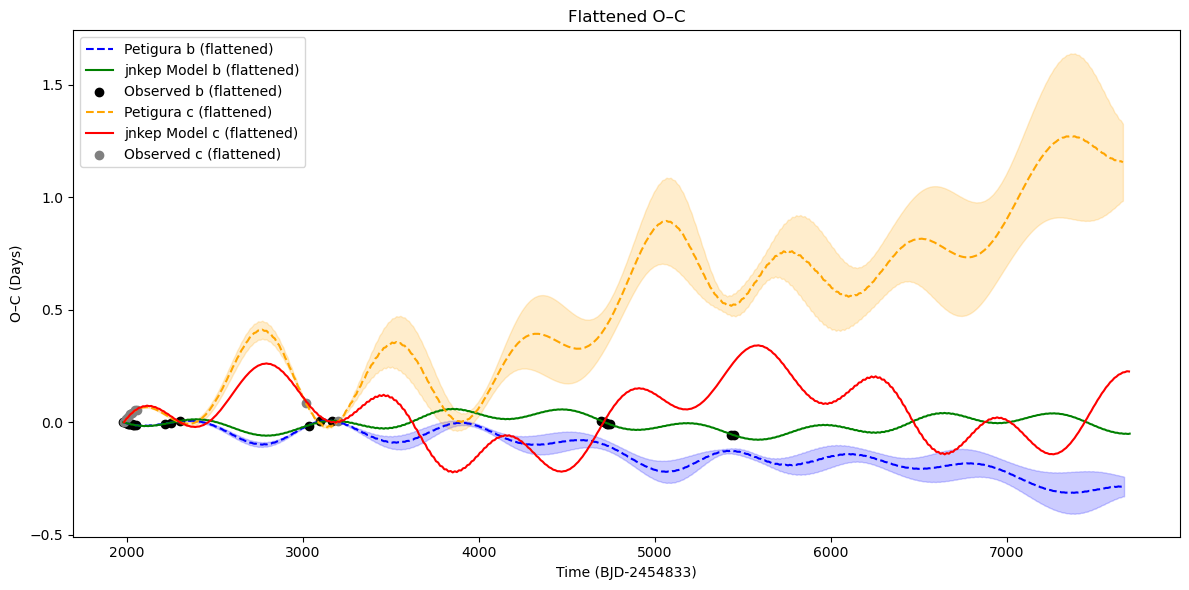

In [53]:
### Fit the linear trend for b and c (using numpy.polyfit)
def apply_trend(t, y, slope):
    # Ensure t and y are NumPy arrays
    t = np.asarray(t)
    y = np.asarray(y)
    # Remove slope, pivot about the first point
    return y - slope * (t - t[0])

### Planet b - Flatten the data
flat_petigura_b = apply_trend(t_petigura_b, ephem_omc_b, b_slope)
flat_jnkep_b = apply_trend(t_jnkep_b, jnkep_omc_b, b_slope)
flat_obs_b = apply_trend(t_obs_b, (omc_obs_b-offset_obs_b), b_slope)

### Planet c - Flatten the data
flat_petigura_c = apply_trend(t_petigura_c, ephem_omc_c, c_slope)
flat_jnkep_c = apply_trend(t_jnkep_c, jnkep_omc_c, c_slope)
flat_obs_c = apply_trend(t_obs_c, (omc_obs_c-offset_obs_c), c_slope)

### Plot flattened data
plt.figure(figsize=(12, 6))

### Plot for Planet b
# plt.plot(t_petigura_b, flat_petigura_b, label='Petigura b (flattened)', linestyle='--',c='b')
plt.plot(t_petigura_b, flat_petigura_b, label='Petigura b (flattened)', linestyle='--', color='b')
plt.fill_between(t_petigura_b,
                 flat_petigura_b - t_err_petigura_b,
                 flat_petigura_b + t_err_petigura_b,
                 color='b', alpha=0.2)

plt.plot(t_jnkep_b, flat_jnkep_b, label='jnkep Model b (flattened)',c='g')
plt.scatter(t_obs_b, flat_obs_b, label='Observed b (flattened)', marker='o', color='black')

### Plot for Planet c
# plt.plot(t_petigura_c, flat_petigura_c, label='Petigura c (flattened)', linestyle='--',c='orange')
plt.plot(t_petigura_c, flat_petigura_c, label='Petigura c (flattened)', linestyle='--', color='orange')
plt.fill_between(t_petigura_c,
                 flat_petigura_c - t_err_petigura_c,
                 flat_petigura_c + t_err_petigura_c,
                 color='orange', alpha=0.2)
plt.plot(t_jnkep_c, flat_jnkep_c, label='jnkep Model c (flattened)',c='r')
plt.scatter(t_obs_c, flat_obs_c, label='Observed c (flattened)', marker='o', color='gray')

### Customize the plot
plt.title('Flattened O–C') # (Slope Removed, Pivoted at First Point)
plt.xlabel(f'Time (BJD-{petigura_offset})')
plt.ylabel('O–C (Days)')
plt.legend()
plt.tight_layout()
plt.show()

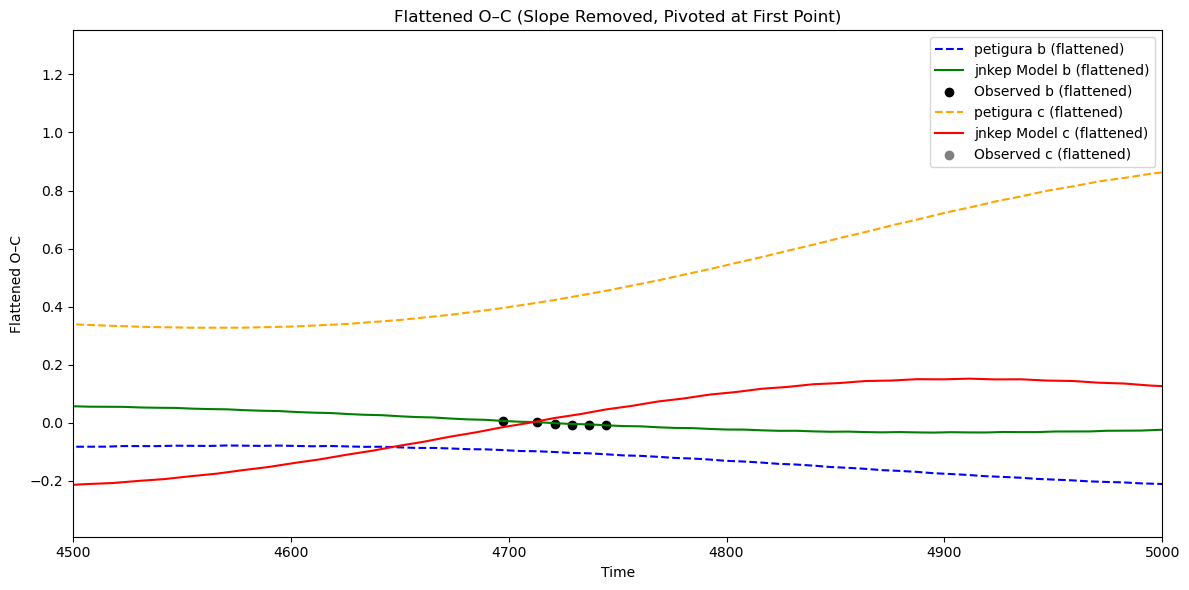

In [37]:
### zoom into section [1980,3500]
### Plot flattened data
plt.figure(figsize=(12, 6))

### Plot for Planet b
plt.plot(t_petigura_b, flat_petigura_b, label='petigura b (flattened)', linestyle='--',c='b')
plt.plot(t_jnkep_b, flat_jnkep_b, label='jnkep Model b (flattened)',c='g')
plt.scatter(t_obs_b, flat_obs_b, label='Observed b (flattened)', marker='o', color='black')

### Plot for Planet c
plt.plot(t_petigura_c, flat_petigura_c, label='petigura c (flattened)', linestyle='--',c='orange')
plt.plot(t_jnkep_c, flat_jnkep_c, label='jnkep Model c (flattened)',c='r')
plt.scatter(t_obs_c, flat_obs_c, label='Observed c (flattened)', marker='o', color='gray')

### Customize the plot
plt.title('Flattened O–C (Slope Removed, Pivoted at First Point)')
plt.xlabel('Time')
plt.ylabel('Flattened O–C')
# plt.xlim(1980,3500)
plt.xlim(4500,5000)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
### add band to the petigura 2020 times 


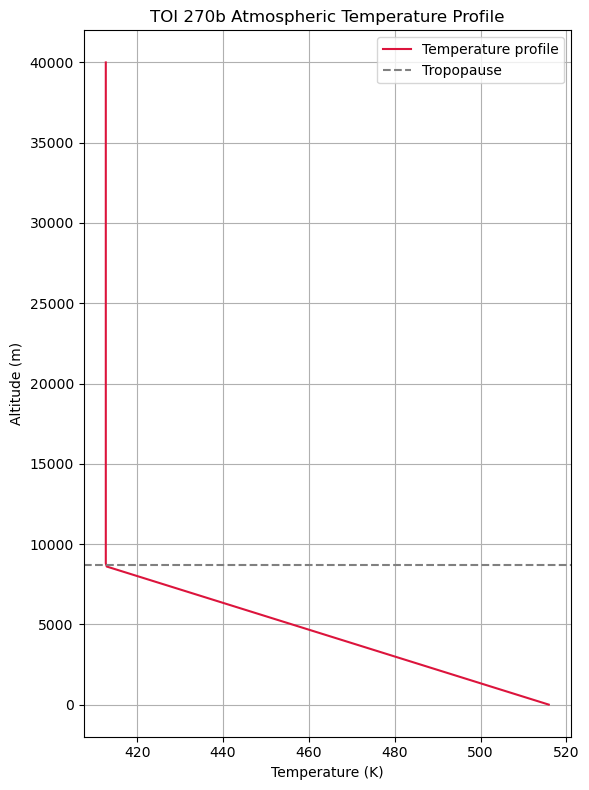

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# --- Constants ---
T0 = 515.87                   # Surface temperature in K
T_tp = 0.8 * T0            # Tropopause temperature (412 K)
P0 = 1e5                   # Surface pressure in Pa (1 bar)
P_tp = 1e4                 # Tropopause pressure in Pa (0.1 bar)
cp = 900                   # Specific heat of CO2 at constant pressure (J/kg/K)
mu = 44                    # Molecular weight of CO2 (g/mol)
G = 6.674e-11
M = 1.58*(5.972e24)
R = 1.2*(6.371e6)
g = (G*M)/(R**2)                  # Surface gravity (m/s^2)
Ru = 8.314                 # Universal gas constant (J/mol/K)
R = Ru / (mu / 1000)       # Specific gas constant for CO2 (J/kg/K)

# --- Lapse rate (dry adiabatic) ---
lapse_rate = g / cp        # dT/dz = -g/cp (K/m)

# --- Integration settings ---
dz = 100                   # Altitude step in meters
z_max = 40000              # Maximum altitude (m)

# --- Lists to store profiles ---
z_vals = [0]
T_vals = [T0]
P_vals = [P0]

# --- Integrate up to the tropopause using dry lapse rate ---
z = 0
T = T0
P = P0

while P > P_tp:
    z += dz
    T = T0 - lapse_rate * z
    if T < T_tp:  # Stop lapse rate if below tropopause temp
        T = T_tp
        break
    # Update pressure using: P = P0 * (T / T0)^(cp/R)
    P = P0 * (T / T0) ** (cp / R)
    z_vals.append(z)
    T_vals.append(T)
    P_vals.append(P)

# Record the transition to the isothermal region
z_tp = z
P = P_tp
T = T_tp

# --- Continue with isothermal region up to 40 km ---
H_tp = R * T_tp / g

while z < z_max:
    z += dz
    P = P_tp * np.exp(-(z - z_tp) / H_tp)
    T = T_tp  # Constant temp
    z_vals.append(z)
    T_vals.append(T)
    P_vals.append(P)

# --- Plot the temperature profile ---
plt.figure(figsize=(6, 8))
plt.plot(T_vals, z_vals, label='Temperature profile', color='crimson')
plt.axhline(y=z_tp, color='gray', linestyle='--', label='Tropopause')
plt.xlabel('Temperature (K)')
plt.ylabel('Altitude (m)')
plt.title("TOI 270b Atmospheric Temperature Profile")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
